### Sentiment Analysis

Now we will try to check difference in how tweets are constructed: are real diasaster tweets less subjective or how negative/ positive are words in tweets 

I will perform analysis using TextBlob.
TextBlob - inguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.

Sentiment of Tweets

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np


In [2]:
corpus = pd.read_pickle('train_corpus.pkl')

corpus.head()

,id,text,target,human,nature
0,1,our deeds are the reason of this earthquake ma...,1,0.0,1.0
1,4,forest fire near la ronge sask canada,1,0.0,1.0
2,5,all residents asked to shelter in place are be...,1,0.0,1.0
3,6,people receive wildfires evacuation orders in ...,1,0.0,1.0
4,7,just got sent this photo from ruby alaska as s...,1,0.0,1.0


In [3]:
# Polarity - how positive or negative are words in text (average); Subjectivity - how subjective text is constructed: 0 fact; 1 Opinion
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


In [4]:
# Now let's apply this functions and create columns polarity and subjectivity

corpus['polarity'] = corpus['text'].apply(pol)
corpus['subjectivity'] = corpus['text'].apply(sub)

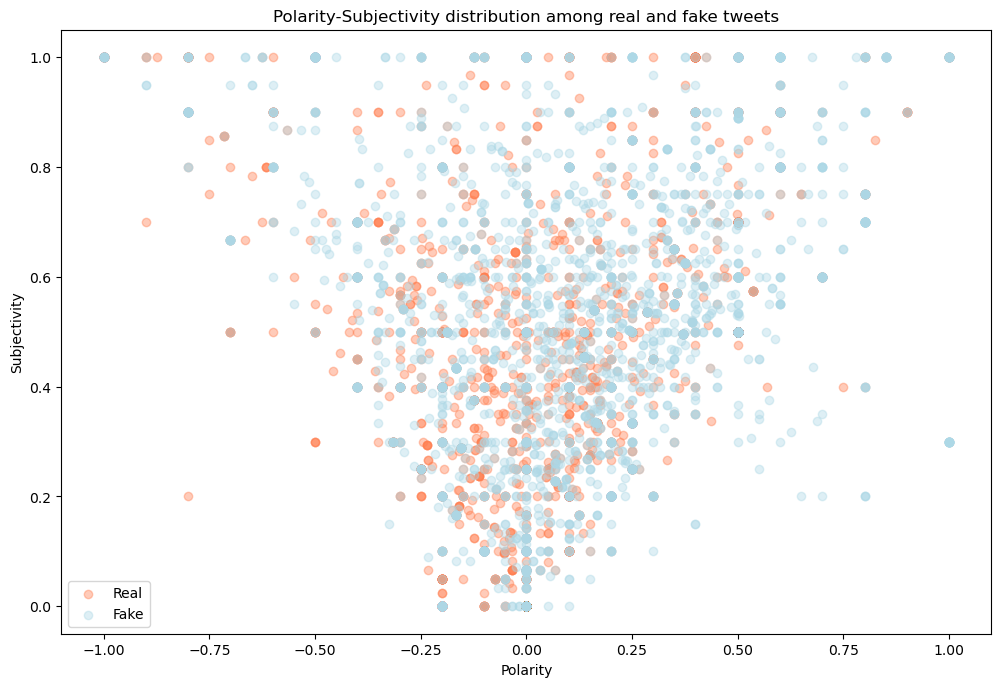

In [5]:
# Now I want to see distribution and difference between real and fake tweets

real = corpus.loc[corpus['target'] == 1, 'id']

real_x = corpus.loc[corpus['id'].isin(real), 'polarity']
real_y = corpus.loc[corpus['id'].isin(real), 'subjectivity']

fake_x = corpus.loc[~corpus['id'].isin(real), 'polarity']
fake_y = corpus.loc[~corpus['id'].isin(real), 'subjectivity']


plt.figure(figsize=(12, 8), dpi = 100)

plt.scatter(real_x, real_y, alpha = 0.4, color = 'coral', label = 'Real')
plt.scatter(fake_x, fake_y, alpha = 0.4, color = 'lightblue', label = 'Fake')

plt.title('Polarity-Subjectivity distribution among real and fake tweets')

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.legend()

plt.show()
plt.close()

We can see that:
    1. fake tweets are more positive and subjective
    2. in general most of tweets polarity is between -0.25 and 0.25
    3. i can drop some outliers to avoid overfitting

let's save this columns which can help us to build more correct model   

In [6]:
# We can notice that there several real disaster tweets which are positive and subjective as much as fake tweets
# Let's check the text of this rows

to_drop = corpus.loc[(corpus['polarity'] >= 0.75) & (corpus['subjectivity'] >= 0.8) & (corpus['id'].isin(real)), 'id']

16 out of 3271 real tweets are too subjective and positive; \n
I think for the sake of model's preformance, I can drop them from dataset

In [7]:
corpus = corpus.loc[~corpus['id'].isin(to_drop), :]



In [8]:
# Also drop them from date-term matrix

dtm = pd.read_pickle('train_dtm_reduced.pkl')

In [9]:
dtm = dtm.loc[~dtm['id'].isin(to_drop), :]

Let's save the work

In [10]:
corpus.to_pickle('train_corpus_sent.pkl')

dtm.to_pickle('train_dtm_reduced_sent.pkl')